<a href="https://colab.research.google.com/github/girishkuks/data_science/blob/main/Linear_Regression_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url = 'https://raw.githubusercontent.com/girishkuks/data_science/refs/heads/main/Customer%20Purchasing%20Behaviors.csv'
df = pd.read_csv(url)

# This is to analyse Purchasing behaviour of customer based on their salary, age, royalty point and their location

# Understand the data type of each **columns**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             238 non-null    int64  
 1   age                 238 non-null    int64  
 2   annual_income       238 non-null    int64  
 3   purchase_amount     238 non-null    int64  
 4   loyalty_score       238 non-null    float64
 5   region              238 non-null    object 
 6   purchase_frequency  238 non-null    int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 13.1+ KB


# Have glance of the data

In [4]:
df.head()

,user_id,age,annual_income,purchase_amount,loyalty_score,region,purchase_frequency
0,1,25,45000,200,4.5,North,12
1,2,34,55000,350,7.0,South,18
2,3,45,65000,500,8.0,West,22
3,4,22,30000,150,3.0,East,10
4,5,29,47000,220,4.8,North,13


# Check if columns have null so that we can treat those accordingly

In [8]:
df.isnull().sum()

,0
user_id,0
age,0
annual_income,0
purchase_amount,0
loyalty_score,0
region,0
purchase_frequency,0


# Use below to understand data more closely such as std, min, max, 25%, 50% and 75% etc

In [9]:
df.describe()

,user_id,age,annual_income,purchase_amount,loyalty_score,purchase_frequency
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,119.500000,38.676471,57407.563025,425.630252,6.794118,19.798319
std,68.848868,9.351118,11403.875717,140.052062,1.899047,4.562884
min,1.000000,22.000000,30000.000000,150.000000,3.000000,10.000000
25%,60.250000,31.000000,50000.000000,320.000000,5.500000,17.000000
50%,119.500000,39.000000,59000.000000,440.000000,7.000000,20.000000
75%,178.750000,46.750000,66750.000000,527.500000,8.275000,23.000000
max,238.000000,55.000000,75000.000000,640.000000,9.500000,28.000000


# Drop UserId as it is PIA

In [16]:
df = df.drop('user_id',axis=1)

In [17]:
df

,age,annual_income,purchase_amount,loyalty_score,region,purchase_frequency
0,25,45000,200,4.5,North,12
1,34,55000,350,7.0,South,18
2,45,65000,500,8.0,West,22
3,22,30000,150,3.0,East,10
4,29,47000,220,4.8,North,13
...,...,...,...,...,...,...
233,40,60000,450,7.2,West,20
234,38,59000,430,6.9,North,20
235,54,74000,630,9.4,South,27
236,32,52000,360,5.8,West,18


# Draw hist plot of all columns to understand data distrubution

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='purchase_amount', ylabel='Count'>

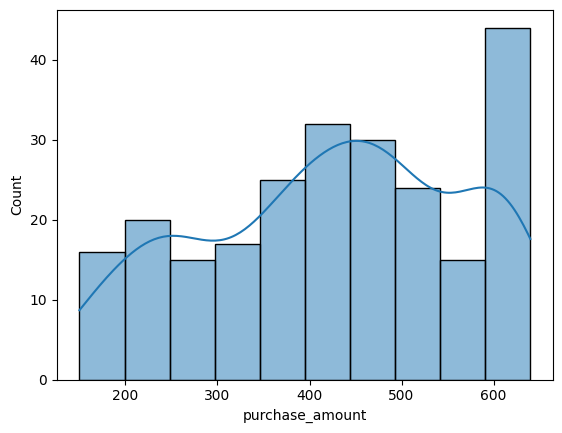

In [29]:
sns.histplot(df['purchase_amount'], bins = 10, kde=True)

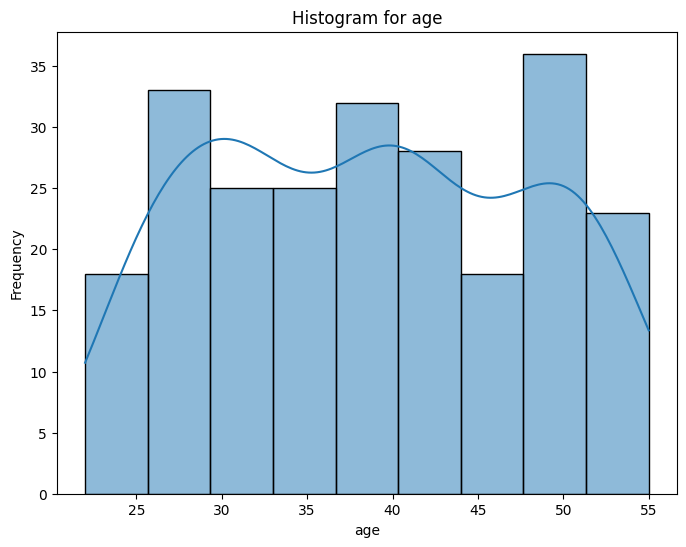

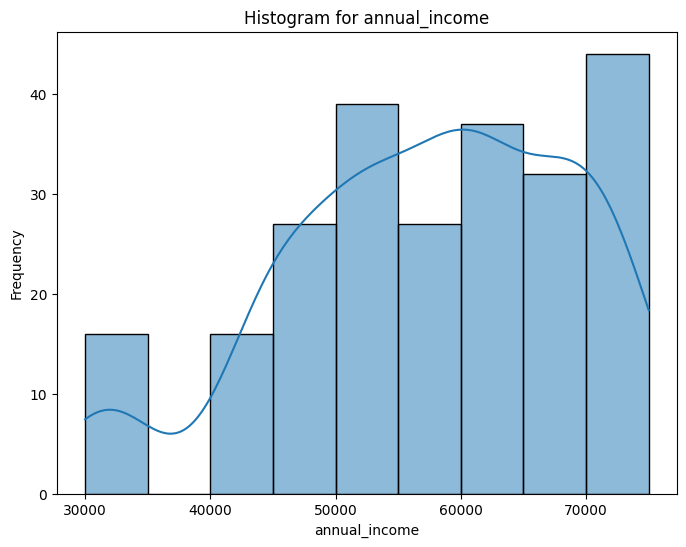

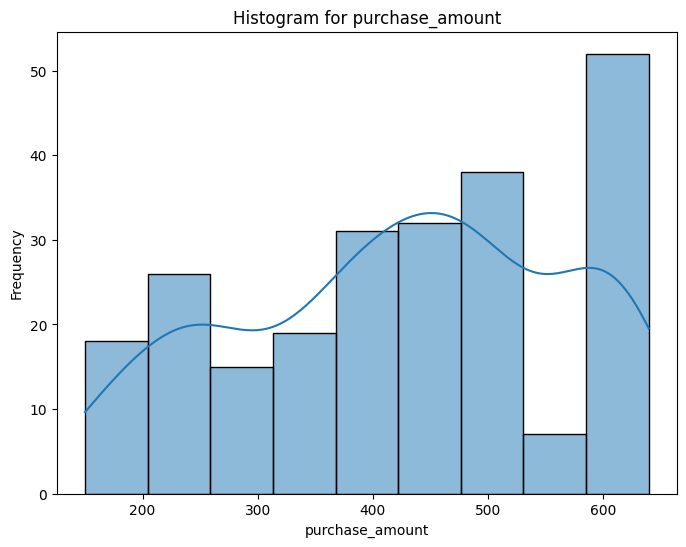

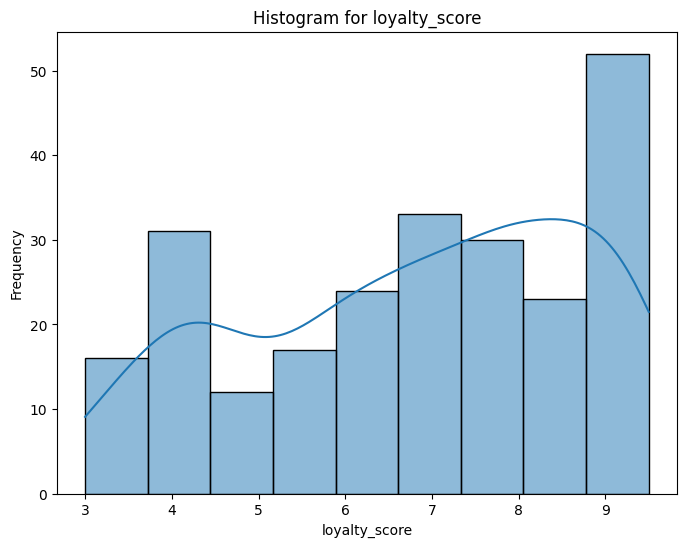

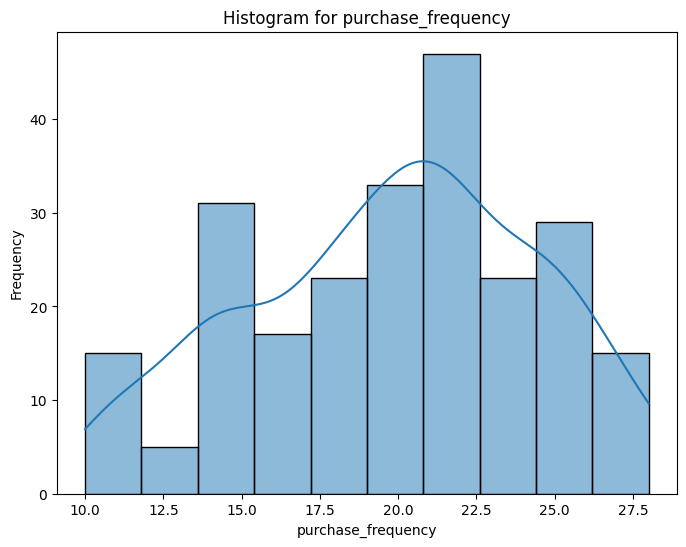

In [37]:
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Draw box plot to understand are their any outliers

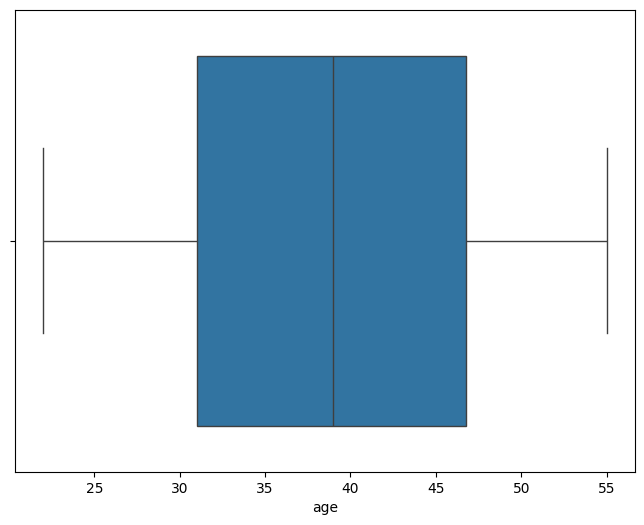

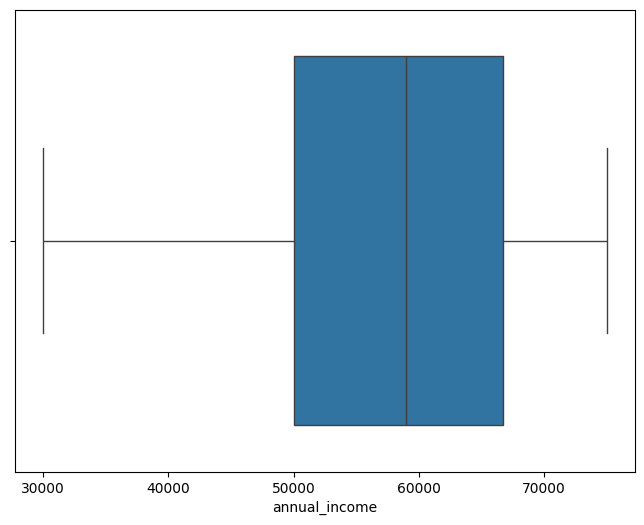

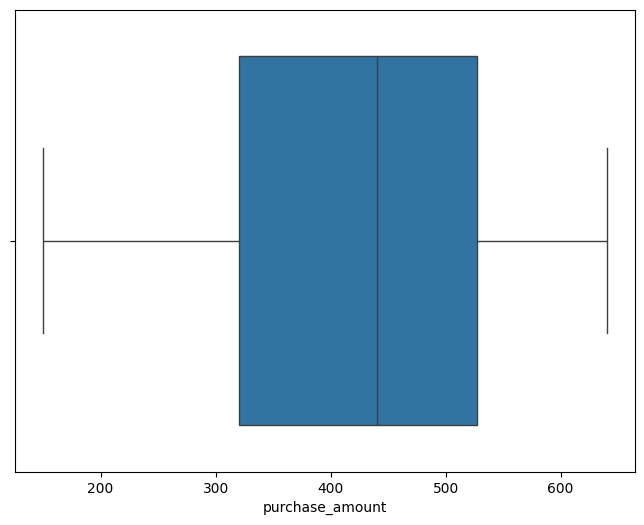

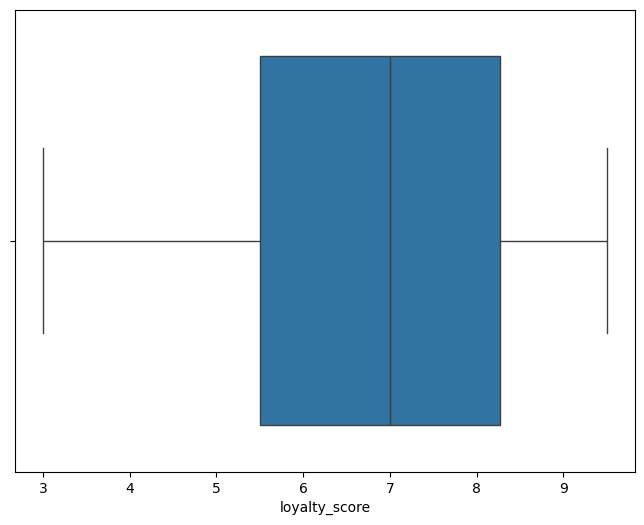

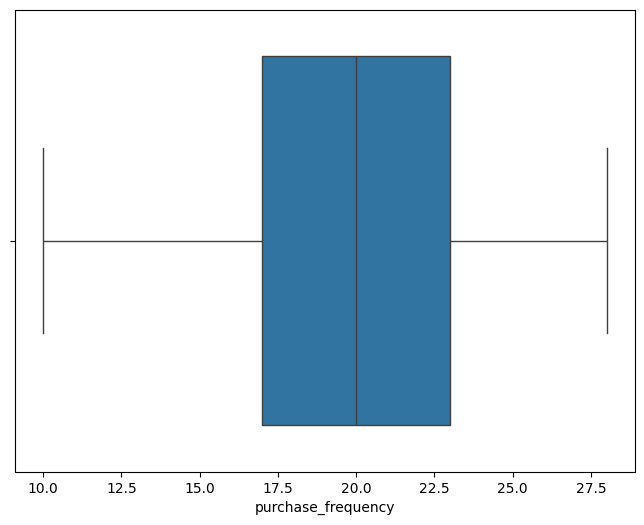

In [39]:
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.show()

#No outliers in any column and hence no need to treat them

In [13]:
df_numeric = df.drop(['region'],axis=1)

In [14]:
df_numeric

,user_id,age,annual_income,purchase_amount,loyalty_score,purchase_frequency
0,1,25,45000,200,4.5,12
1,2,34,55000,350,7.0,18
2,3,45,65000,500,8.0,22
3,4,22,30000,150,3.0,10
4,5,29,47000,220,4.8,13
...,...,...,...,...,...,...
233,234,40,60000,450,7.2,20
234,235,38,59000,430,6.9,20
235,236,54,74000,630,9.4,27
236,237,32,52000,360,5.8,18


#Understand the correlation of all columns with target and we we strong correlation

In [15]:
corr = df_numeric.corr()

In [16]:
corr

,user_id,age,annual_income,purchase_amount,loyalty_score,purchase_frequency
user_id,1.000000,0.067061,0.059031,0.080621,0.060819,0.070541
age,0.067061,1.000000,0.974833,0.986140,0.981835,0.980532
annual_income,0.059031,0.974833,1.000000,0.984208,0.984351,0.982920
purchase_amount,0.080621,0.986140,0.984208,1.000000,0.994147,0.993579
loyalty_score,0.060819,0.981835,0.984351,0.994147,1.000000,0.986990
purchase_frequency,0.070541,0.980532,0.982920,0.993579,0.986990,1.000000


#Encode categorical column

In [28]:
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()

df['region'] = labelEncoder.fit_transform(df['region'])
df

,user_id,age,annual_income,purchase_amount,loyalty_score,region,purchase_frequency
0,1,25,45000,200,4.5,1,12
1,2,34,55000,350,7.0,2,18
2,3,45,65000,500,8.0,3,22
3,4,22,30000,150,3.0,0,10
4,5,29,47000,220,4.8,1,13
...,...,...,...,...,...,...,...
233,234,40,60000,450,7.2,3,20
234,235,38,59000,430,6.9,1,20
235,236,54,74000,630,9.4,2,27
236,237,32,52000,360,5.8,3,18


# Create X and Y
# Y - Purchage Frequency
# X - All remaining columns

In [52]:
X = df.drop('purchase_frequency', axis=1)
Y = df['purchase_frequency']


# Split test and train data

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=42,test_size=0.2)

# Use standard scalar to X train and X test



In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [55]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, Y_train)

LinearRegression()

In [41]:
Y_pred = model.predict(X_test_scaled)

In [43]:
from sklearn.metrics import mean_squared_error, r2_score

In [45]:
mse = mean_squared_error(Y_test, Y_pred)

In [50]:
r2 = r2_score(Y_test, Y_pred)

#Mean Squared error is less

In [49]:
print('Mean Squared Error ---', mse)

Mean Squared Error --- 0.24658570938088128


# R2 square is also very good

In [51]:
print('R square---', r2)

R square--- 0.989469649421457
